## Lab : Dimensionality reduction using PCA and K-Means

We will use a wine dataset that is packaged into the scikit learn :
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [27]:
import csv
import urllib

import pandas as pd

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
%matplotlib inline


### Load the wine dataset into a Dataframe, create X, y variable

In [28]:
wines = load_wine()
wine_df = pd.DataFrame(wines.data, columns=wines.feature_names)
X = wines.data
y = wines.target
wine_df.shape

(178, 13)

In [29]:
X = wines.data
y = wines.target

In [30]:
print(X.shape, y.min(),y.max())

(178, 13) 0 2


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

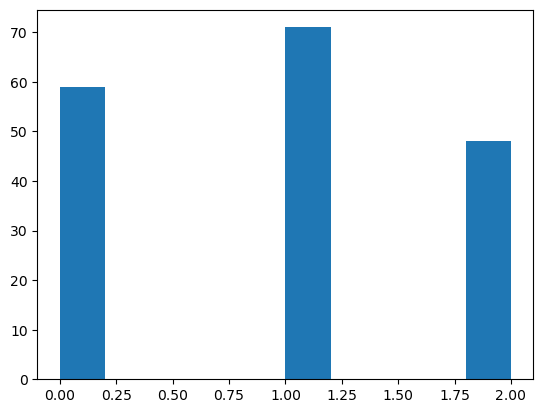

In [31]:
plt.hist(y)

### PCA

**Machine Learning task**:  Find a more compact representation of the key features of wine

#### Exercise :

1) Normalize the X data by subtracting mean and dividing by standard deviation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scl = scaler.fit_transform(X)
X_scl

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

2) Create a PCA model and apply it to the scaled X data. Assign the result to a variable named Z (I will use this variable in a plot below) Pg 222 in the book is relevant (but do not restrict it to just 2 Principal components)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(random_state=19)
Z = pca.fit_transform(X_scl)

#### Exercise

1) Display the contents of the explained_variance_ratio_ variable.    What does this information tell you ?

In [34]:
# indicates the proportion of the dataset’s variance that lies along each principal component
# In other words, the first 3 components comprise of 61% of the variance
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

2) plot the explained_variance_ratio_    plt.plot(...)

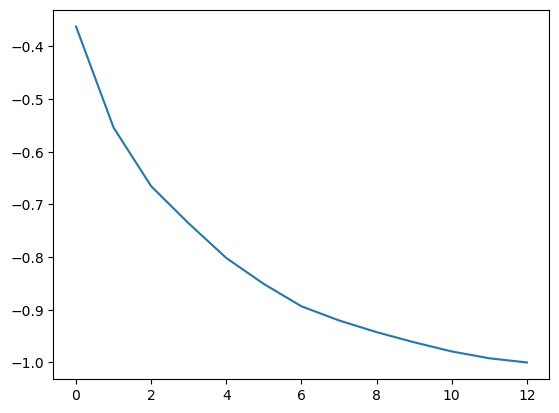

In [41]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(-cumsum)

#### Exercise

Provide a clear and succient explanation for the plot given below. Note, this plot depends on the result of PCA being assign to a variable named Z  

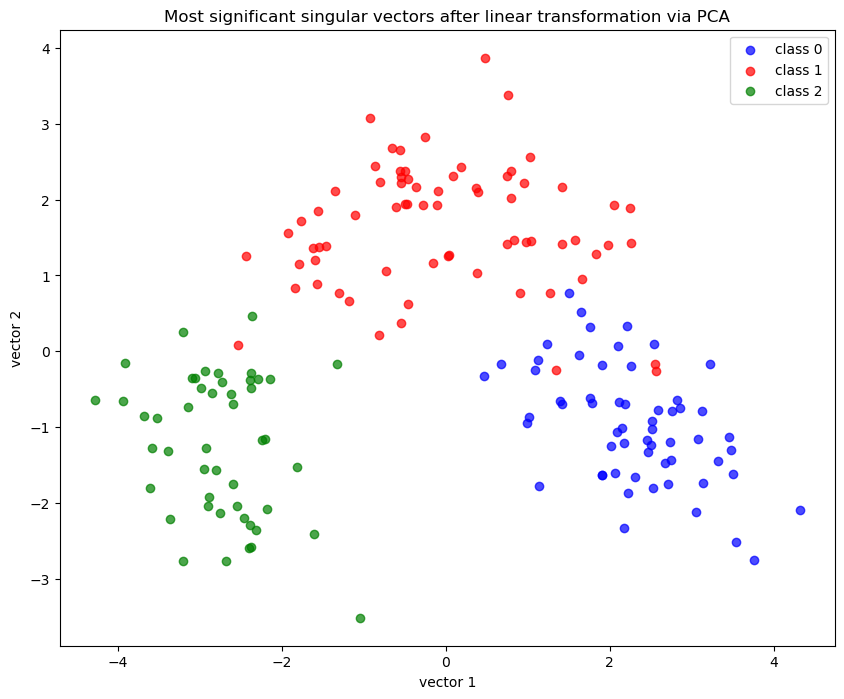

In [36]:
plt.figure(figsize=(10,8))
colors = ('blue', 'red', 'green')

for i in range(0,3):
    plt.scatter(x=Z[:,0][y == i],y=Z[:,1][y == i],color=colors[i],alpha=0.7,label='class {}'.format(i))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

It appears as if this graph is plotting the three most important principal components. In this case, this would be the three principal components that preserve the most variance during a linear transformation. This is supported by the graph title.

### K-Means

**Machine Learning task** Group together similar instances of data

#### Exercise : Figure out a good number of clusters

We need to try a number of different clusters and measure the tightness of the clusters using the inertia_ variable.

1) Initialize an empty array named inertia

2) for i in range(1,11):
    a) create a K-Means object with i clusters
    b) fit the K-Means object to the scaled X data
    c) append the inertia_ associated with the k-means fit to inertia array

Plot inertia vs number of clusters. This is known as the elbow method. How many clusters should we select ?

c:\Users\sj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[2314.0000000000005, 1659.0079672511504, 1277.928488844642, 1204.055466089521, 1119.9793582193743, 1076.2614255412627, 1019.9317744406085, 966.683103661238, 931.4234495884492, 865.0292565446925]


c:\Users\sj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


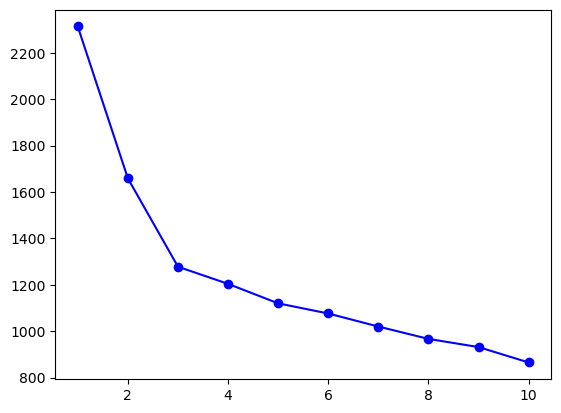

In [65]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(X_scl)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.plot(range(1,11), inertia, 'bo-')

#### Exercise :  Calculate K-Means for the chosen number of clusters

Call the method fit_predict on the scaled data and assign the result to a variable named y_pred. y_pred will have the cluster assignments.

In [66]:
kmeans = KMeans(n_clusters=3, n_init='auto')
y_pred = kmeans.fit_predict(X_scl)

c:\Users\sj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Exercise :  Plot the results

Unlike the book, we have many different columns of data, initially, it may not be clear how to plot these clusters in such a large multi-dimensional space.

But, then, we remember that we have an alternative lower dimensional representation of our data using Principal components. Create a copy and alter the above scatterplot to display colors based on y_pred rather than the y variable from the scikit learn model.

Why are the colors different ?

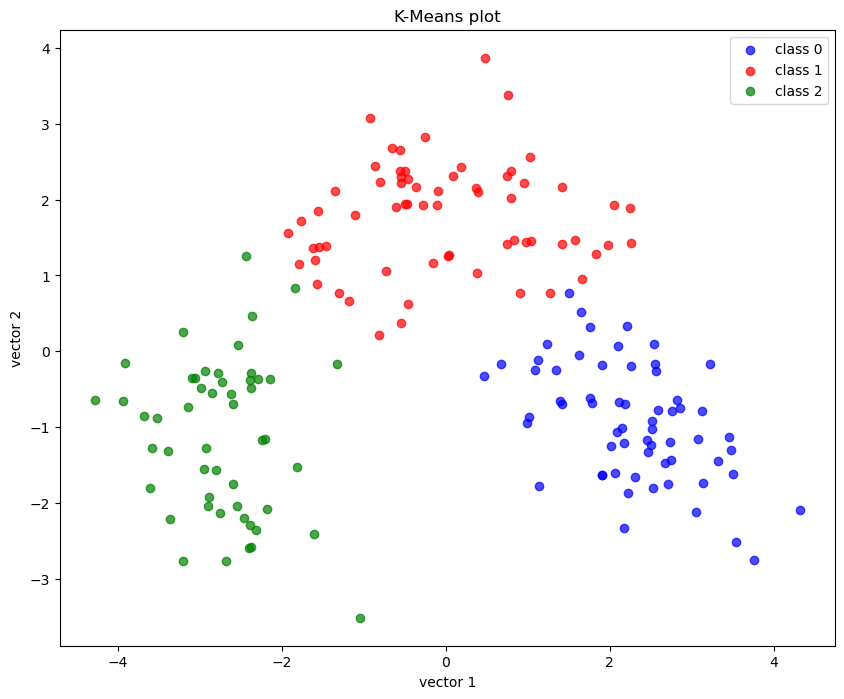

In [64]:
plt.figure(figsize=(10,8))
colors = ('blue', 'red', 'green')

for i in range(0,3):
    plt.scatter(x=Z[:,0][y_pred == i],y=Z[:,1][y_pred == i],color=colors[i],alpha=0.7,label='class {}'.format(i))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('K-Means plot')

plt.show()

# Colors

The colors appear different in these clusters because there is no order to the identification of them. K-means is able to identify clusters, but it doesn't know what these clusters are or what they identify. The color is for us to be able to visualize these cluster groups.

### Extra Credit/Graduate students

The “Wine” Dataset that is deposited on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality). It has 11 variables and 1600 observations.Do a similar PCA and K-Means analysis on the data. Note that it has a different number of quality levels. In addition to providing the notebook, provide your thoughts on the differences in the two datasets.
